In [2]:
import pandas as pd
debt_price_df = pd.read_csv('debt_price_df.csv')

# Debt Price Heuristic - option 1

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1\hat{p} + D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1\hat{p} - D_1\hat{p} - D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* - D_2\hat{p}$  

Let's assume $V_{t+1}=V_t$
* $Q_{t+1}\rho^*_{t+1} - D_{2;t+1}\hat{p}_{t+1} = Q_{t}\rho^*_{t} - D_{2;t}\hat{p}_{t}$

Solve for $\hat{p}_{t+1}$
* $D_{2;t+1}\hat{p}_{t+1} = Q_{t+1}\rho^*_{t+1} - Q_{t}\rho^*_{t} + D_{2;t}\hat{p}_{t}$
* $D_{2;t+1}\hat{p}_{t+1} = C^*_{t+1} - C^*_{t} + D_{2;t}\hat{p}_{t}$
* $\hat{p}_{t+1} = \frac{C^*_{t+1} - C^*_{t} + D_{2;t}\hat{p}_{t}}{D_{2;t+1}}$
* $\hat{p}_{t+1} = \frac{\Delta{C^*} + D_{2;t}\hat{p}_{t}}{D_{2;t+1}}$

Assume $\hat{p}_0 = p^*_0$

For practical purposes (we want to compute $\hat{p}$ using trivial pandas Series operations), let's reorganize the terms of the equations in a different way
* $Q_{t}\rho^*_{t} - D_{2;t}\hat{p}_{t} = V_0$
* $D_{2;t}\hat{p}_{t} = Q_{t}\rho^*_{t} - V_0$
* $\hat{p}_{t} = \frac{Q_{t}\rho^*_{t} - V_0}{D_{2;t}}$

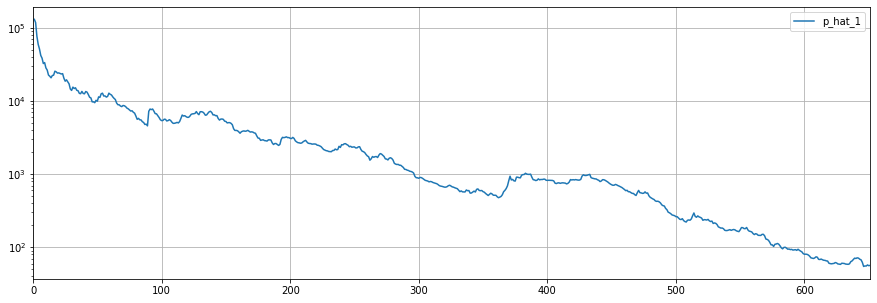

In [3]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']
V_0 = C_star_0 - D_2_0 * p_hat_0

C_star = debt_price_df['C_star']
D_2 = debt_price_df['D_2']
debt_price_df['p_hat_1'] = (C_star - V_0) / D_2
debt_price_df.plot(y='p_hat_1', logy=True, figsize=(15,5), grid=True)

# Debt Price Heuristic - option 2

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   

$V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1 p^* + D_2p^*$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1 (\hat p - p^*) - D_2p^*$  

Zargham's comment: while this turns out to be a bit more complex, one thing i like about it is that it results in a debt price described as a correction to the redemption price, which i think will help when we look to apply the model \[beyond\] the DAI system.

Let's assume $\hat{p}_0 = p^*_0$ and $V_t=V_0 \forall t$   
* $V_t = Q_{t}\rho_{t}^* + D_{1; t} (\hat p_{t} - p_{t}^*) - D_{2:t}p^*_{t}=V_0$

Solve for $\hat p_{t}$  
* $Q_{t}\rho_{t}^* + D_{1; t} (\hat p_{t} - p_{t}^*) - D_{2:t}p^*_{t}=V_0$
* $D_{1; t} (\hat p_{t} - p_{t}^*) = V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t+1}$
* $\hat p_{t} - p_{t}^* = \frac{V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t}}{D_{1; t}}$
* $\hat p_{t} = \frac{V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t}}{D_{1; t}} + p_{t}^*$

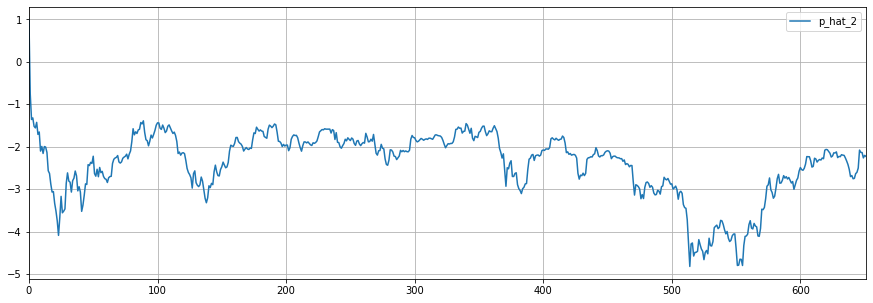

In [4]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']
V_0 = C_star_0 + D_1_0 * (p_hat_0 - p_star_0) - D_2_0 * p_star_0

p_star = debt_price_df['p_star']
C_star = debt_price_df['C_star']
D_1 = debt_price_df['D_1']
D_2 = debt_price_df['D_2']
debt_price_df['p_hat_2'] = (V_0 - C_star + D_2 * p_star) / D_1 + p_star
debt_price_df.plot(y='p_hat_2', figsize=(15,5), grid=True)

# Debt Price Heuristic - option 3

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   

$V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1p^*$  
    * $liabilities = D_1 \hat{p} + D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1 (p^* - \hat{p}) - D_2\hat{p}$  

Let's assume $\hat{p}_0 = p^*_0$ and $V_t=V_0 \forall t$   
* $V_t = Q_t\rho^*_t + D_{1;t} (p^*_t - \hat{p}_t) - D_{2;t}\hat{p}_t = V_0$  

Solve for $\hat{p}_t$
* $Q_t\rho^*_t + D_{1;t} (p^*_t - \hat{p}_t) - D_{2;t}\hat{p}_t = V_0$
* $Q_t\rho^*_t + D_{1;t} p^*_t - V_0 = (D_{1;t} + D_{2;t})\hat{p}_t$
* $\hat{p}_t = \frac{Q_t\rho^*_t + D_{1;t} p^*_t - V_0}{D_{1;t} + D_{2;t}}$

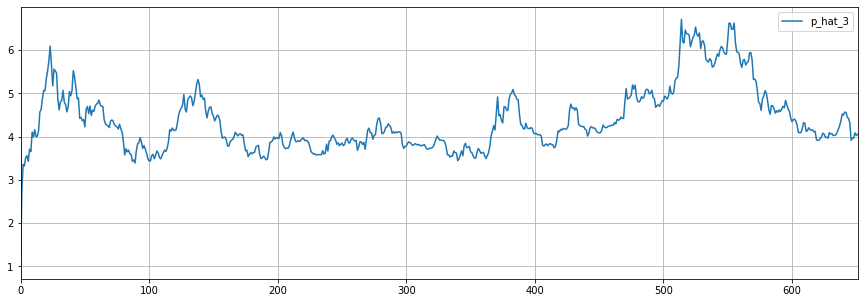

In [5]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']
V_0 = C_star_0 + D_1_0 * (p_hat_0 - p_star_0) - D_2_0 * p_star_0

p_star = debt_price_df['p_star']
C_star = debt_price_df['C_star']
D_1 = debt_price_df['D_1']
D_2 = debt_price_df['D_2']
debt_price_df['p_hat_3'] = (C_star + D_1 * p_star - V_0) / (D_1 + D_2)
debt_price_df.plot(y='p_hat_3', figsize=(15,5), grid=True)

# Debt Price Heuristic - option 4

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   

$V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = \frac{liabilities}{assets}$  
    * $assets = Q \rho^* + D_1 \hat{p}$  
    * $liabilities = D_1 \hat{p} + D_2 \hat{p}$  
* $V(\mathcal{X},\hat{p}) = \frac{D_1 \hat{p} + D_2 \hat{p}}{Q \rho^* + D_1 \hat{p}}$  

Let's assume $\hat{p}_0 = p^*_0$ and $V_t=V_0 \forall t$   
* $V_t = \frac{D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t}{Q_t \rho^*_t + D_{1;t} \hat{p}_t} = V_0$   


Solve for $\hat{p}_t$
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t = V_0 Q_t \rho^*_t + V_0 D_{1;t} \hat{p}_t$
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t - V_0 D_{1;t} \hat{p}_t = V_0 Q_t \rho^*_t $
* $(D_{1;t} + D_{2;t} - V_0 D_{1;t}) \hat{p}_t = V_0 Q_t \rho^*_t $
* $\hat{p}_t = \frac{V_0 Q_t \rho^*_t}{D_{1;t} + D_{2;t} - V_0 D_{1;t}}$

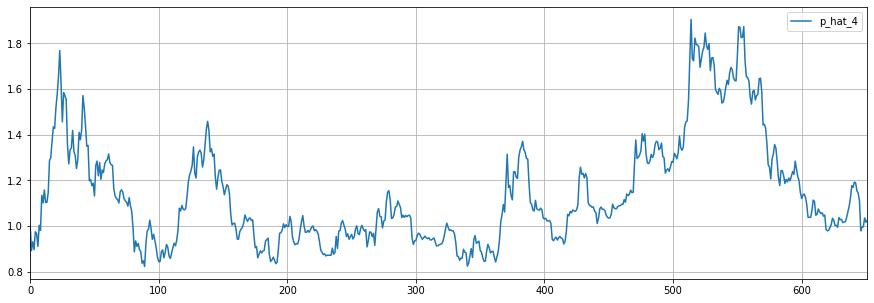

In [6]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']
V_0 = (D_1_0 * p_hat_0 + D_2_0 * p_hat_0) / (C_star_0 + D_1_0 * p_hat_0)

p_star = debt_price_df['p_star']
C_star = debt_price_df['C_star']
D_1 = debt_price_df['D_1']
D_2 = debt_price_df['D_2']
debt_price_df['p_hat_4'] = C_star * V_0 / (D_1 + D_2 - V_0 * D_1)
debt_price_df.plot(y='p_hat_4', figsize=(15,5), grid=True)

# Debt Price Heuristic - option 5

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   

$V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = \frac{liabilities}{assets}$  
    * $assets = Q \rho^* + D_1 p^*$  
    * $liabilities = D_1 \hat{p} + D_2 \hat{p}$  
* $V(\mathcal{X},\hat{p}) = \frac{D_1 \hat{p} + D_2 \hat{p}}{Q \rho^* + D_1 p^*}$  

Let's assume $\hat{p}_0 = p^*_0$ and $V_t=V_0 \forall t$   
* $V_t = \frac{D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t}{Q_t \rho^*_t + D_{1;t} p^*_t} = V_0$   


Solve for $\hat{p}_t$
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t = V_0 (Q_t \rho^*_t + D_{1;t} p^*_t)$
* $ \hat{p}_t = \frac{V_0 (Q_t \rho^*_t + D_{1;t} p^*_t)}{D_{1;t} + D_{2;t}}$

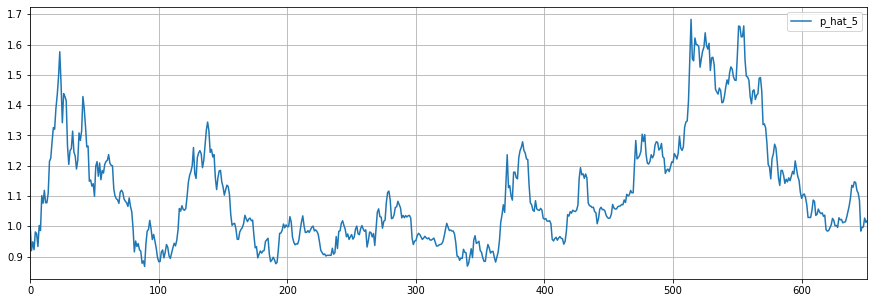

In [7]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']
V_0 = (D_1_0 * p_hat_0 + D_2_0 * p_hat_0) / (C_star_0 + D_1_0 * p_star_0)

p_star = debt_price_df['p_star']
C_star = debt_price_df['C_star']
D_1 = debt_price_df['D_1']
D_2 = debt_price_df['D_2']
debt_price_df['p_hat_5'] = V_0 * (C_star + D_1 * p_star) / (D_1 + D_2)
debt_price_df.plot(y='p_hat_5', figsize=(15,5), grid=True)

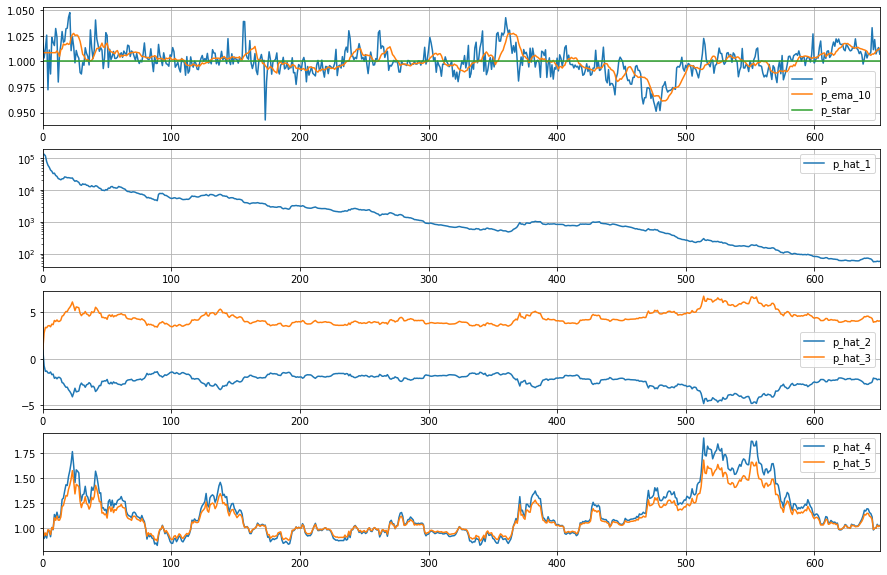

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 1, figsize=(15,10))

debt_price_df.plot(y=['p', 'p_ema_10', 'p_star'], ax=axs[0], grid=True)
debt_price_df.plot(y=['p_hat_1'], logy=True, ax=axs[1], grid=True)
debt_price_df.plot(y=['p_hat_2'], ax=axs[2], grid=True)
debt_price_df.plot(y=['p_hat_3'], ax=axs[2], grid=True)
debt_price_df.plot(y=['p_hat_4'], ax=axs[3], grid=True)
debt_price_df.plot(y=['p_hat_5'], ax=axs[3], grid=True)